# Amazon Product Recommendation System

## Introduction:
In this project, we analyze Amazon product reviews to build a smart recommendation system. Our goal is to understand customer feedback, find useful product insights, and suggest the best products. Here’s how we’ll do it:

📊 Data Preparation: We load the dataset, which includes product details like names, categories, prices, ratings, and reviews. After cleaning the data, it’s ready for analysis.

🔎 Content-Based Filtering: We use product descriptions and reviews to find similar items using text analysis techniques.

🤝 Collaborative Filtering: We recommend products based on user ratings. If people with similar interests like a product, you might like it too!

⚡ Hybrid Approach: We combine both content-based and collaborative filtering for better recommendations.

📝 Text Analysis: We analyze reviews and descriptions to get deeper insights, helping improve product suggestions.

# Importing Libraries

In [5]:
#Loading packages and libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

In [6]:
# Read your dataset
train_data = pd.read_csv("/content/amazon.csv")
print(train_data.columns)

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [7]:
train_data.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data Pre-Processing

In [8]:
train_data = train_data[['user_id','product_id', 'rating', 'rating_count', 'category', 'product_name', 'img_link', 'about_product']]
train_data.head(3)

,user_id,product_id,rating,rating_count,category,product_name,img_link,about_product
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...


In [9]:
#Basic operations
train_data['about_product']

,about_product
0,High Compatibility : Compatible With iPhone 12...
1,"Compatible with all Type C enabled devices, be..."
2,【 Fast Charger& Data Sync】-With built-in safet...
3,The boAt Deuce USB 300 2 in 1 cable is compati...
4,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...
1460,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,"230 Volts, 400 watts, 1 Year"
1462,International design and styling|Two heat sett...
1463,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [10]:
train_data.shape

(1465, 8)

In [11]:
#Getting missing values to identify them
train_data.isnull().sum()

,0
user_id,0
product_id,0
rating,0
rating_count,2
category,0
product_name,0
img_link,0
about_product,0


In [12]:
#Getting missing values to identify them
train_data.isnull().sum()

,0
user_id,0
product_id,0
rating,0
rating_count,2
category,0
product_name,0
img_link,0
about_product,0


In [13]:
train_data.duplicated().sum()

20

In [14]:
train_data_cleaned = train_data.drop_duplicates(subset=['user_id', 'product_id'])
train_data_cleaned

,user_id,product_id,rating,rating_count,category,product_name,img_link,about_product
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2,"94,363",Computers&Accessories|Accessories&Peripherals|...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2,"16,905",Computers&Accessories|Accessories&Peripherals|...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...,...,...,...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",B08L7J3T31,4,"1,090",Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",B01M6453MB,4.1,"4,118",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230 Volts, 400 watts, 1 Year"
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",B009P2LIL4,3.6,468,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,International design and styling|Two heat sett...
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...",B00J5DYCCA,4,"8,031","Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [15]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'user_id': 'ID',
    'product_id': 'ProdID',
    'rating': 'Rating',
    'rating_count': 'ReviewCount',
    'category': 'Category',
    'product_name': 'Name',
    'img_link': 'ImageURL',
    'about_product': 'Description'
}


# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [16]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",B07JW9H4J1,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",B098NS6PVG,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",B096MSW6CT,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",B08HDJ86NZ,4.2,"94,363",Computers&Accessories|Accessories&Peripherals|...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",B08CF3B7N1,4.2,"16,905",Computers&Accessories|Accessories&Peripherals|...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...,...,...,...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",B08L7J3T31,4,"1,090",Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",B01M6453MB,4.1,"4,118",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230 Volts, 400 watts, 1 Year"
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",B009P2LIL4,3.6,468,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,International design and styling|Two heat sett...
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...",B00J5DYCCA,4,"8,031","Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [17]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_id = LabelEncoder()
le_prod = LabelEncoder()

train_data['ID']= le_id.fit_transform(train_data['ID'])
train_data['ProdID'] = le_prod.fit_transform(train_data['ProdID'])

In [18]:
train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description
0,623,346,4.2,"24,269",Computers&Accessories|Accessories&Peripherals|...,Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,High Compatibility : Compatible With iPhone 12...
1,88,848,4.0,"43,994",Computers&Accessories|Accessories&Peripherals|...,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"Compatible with all Type C enabled devices, be..."
2,849,819,3.9,"7,928",Computers&Accessories|Accessories&Peripherals|...,Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,【 Fast Charger& Data Sync】-With built-in safet...
3,254,643,4.2,"94,363",Computers&Accessories|Accessories&Peripherals|...,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,The boAt Deuce USB 300 2 in 1 cable is compati...
4,17,588,4.2,"16,905",Computers&Accessories|Accessories&Peripherals|...,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,[CHARGE & SYNC FUNCTION]- This cable comes wit...
...,...,...,...,...,...,...,...,...
1460,1050,673,4,"1,090",Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...
1461,425,201,4.1,"4,118",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230 Volts, 400 watts, 1 Year"
1462,865,27,3.6,468,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,International design and styling|Two heat sett...
1463,300,61,4,"8,031","Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,Fan sweep area: 230 MM ; Noise level: (40 - 45...


In [19]:
train_data.duplicated().sum()

20

In [20]:
#EDA (Exploratory Data Analysis)

# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1194
Number of unique items: 1351
Number of unique ratings: 28


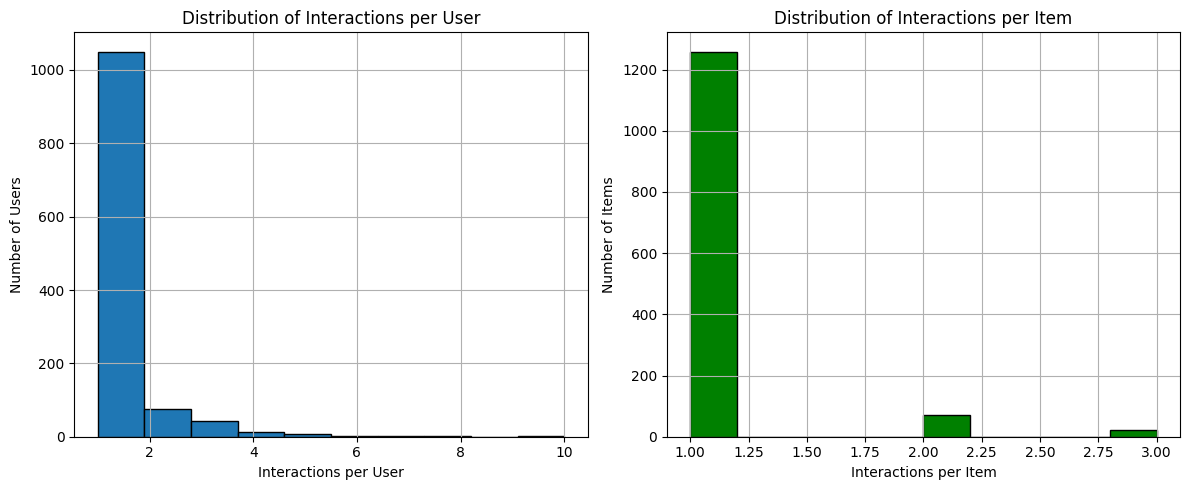

In [21]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['ID'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['ProdID'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

<Axes: xlabel='Rating'>

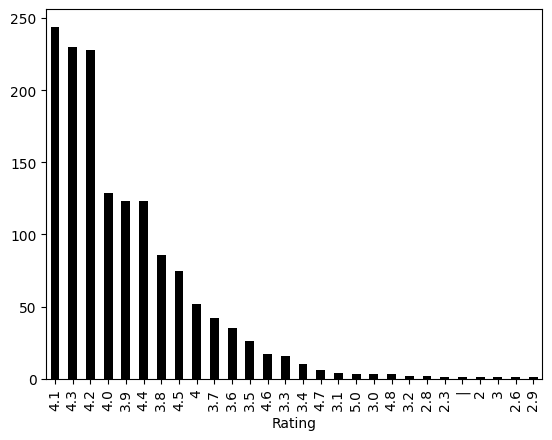

In [22]:
# most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='Black')

In [23]:
pip install spacy

In [24]:
#Data Cleaning and Tags Creations
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [25]:
# Replace '|' with ',' in the 'Category' column for all records
train_data['Category'] = train_data['Category'].str.replace('|', ',')

train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description
0,623,346,4.2,"24,269","Computers&Accessories,Accessories&Peripherals,...",Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,"high, compatibility, compatible, iphone, 12, 1..."
1,88,848,4.0,"43,994","Computers&Accessories,Accessories&Peripherals,...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"compatible, type, c, enabled, devices, android..."
2,849,819,3.9,"7,928","Computers&Accessories,Accessories&Peripherals,...",Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,"fast, charger, data, built, safety, proctectio..."
3,254,643,4.2,"94,363","Computers&Accessories,Accessories&Peripherals,...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,"boat, deuce, usb, 300, 2, 1, cable, compatible..."
4,17,588,4.2,"16,905","Computers&Accessories,Accessories&Peripherals,...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,"charge, sync, cable, comes, charging, data, sy..."
...,...,...,...,...,...,...,...,...
1460,1050,673,4,"1,090","Home&Kitchen,Kitchen&HomeAppliances,WaterPurif...",Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,"supreme, quality, 90, gram, 3, layer, thik, pp..."
1461,425,201,4.1,"4,118","Home&Kitchen,Kitchen&HomeAppliances,SmallKitch...",Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230, volts, 400, watts, 1, year"
1462,865,27,3.6,468,"Home&Kitchen,Heating,Cooling&AirQuality,RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,"international, design, heat, settings, 1000, w..."
1463,300,61,4,"8,031","Home&Kitchen,Heating,Cooling&AirQuality,Fans,E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,"fan, sweep, area, 230, mm, noise, level, 40, 4..."


In [26]:
columns_to_extract_tags = ['Description','Category']

# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags].apply(lambda row: ', '.join(row), axis=1)

# Convert the 'Rating' column to numeric, forcing errors to NaN
train_data['Rating'] = pd.to_numeric(train_data['Rating'], errors='coerce')


In [27]:
train_data.to_csv('cleaned_data.csv', index=False)

In [28]:
from IPython.display import FileLink

# Provide the link to download the cleaned data file
FileLink('cleaned_data.csv')

/content/cleaned_data.csv

# Rating Base system for first view



In [29]:
#Rating Base Recommendations System
average_ratings =train_data.groupby(['Name','ReviewCount','ImageURL'])['Rating'].mean().reset_index()

In [30]:
average_ratings.sort_values(by='Rating', ascending=False)

,Name,ReviewCount,ImageURL,Rating
1123,Syncwire LTG to USB Cable for Fast Charging Co...,5,https://m.media-amazon.com/images/I/317OoQfs1g...,5.0
86,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,https://m.media-amazon.com/images/I/31+Rg6Z46d...,5.0
803,"Oratech Coffee Frother electric, milk frother ...",28,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
551,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...","3,964",https://m.media-amazon.com/images/W/WEBP_40237...,4.8
1121,Swiffer Instant Electric Water Heater Faucet T...,"53,803",https://m.media-amazon.com/images/I/41+t2HWvwF...,4.8
...,...,...,...,...
993,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,87,https://m.media-amazon.com/images/I/41lnTFZGz9...,2.8
462,Green Tales Heat Seal Mini Food Sealer-Impulse...,24,https://m.media-amazon.com/images/W/WEBP_40237...,2.6
844,"Personal Size Blender, Portable Blender, Batte...",13,https://m.media-amazon.com/images/I/417TQs3uro...,2.3
595,Khaitan ORFin Fan heater for Home and kitchen-...,2,https://m.media-amazon.com/images/W/WEBP_40237...,2.0


In [31]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)
rating_base_recommendation = top_rated_items.head(15)
rating_base_recommendation

,Name,ReviewCount,ImageURL,Rating
1123,Syncwire LTG to USB Cable for Fast Charging Co...,5,https://m.media-amazon.com/images/I/317OoQfs1g...,5.0
86,Amazon Basics Wireless Mouse | 2.4 GHz Connect...,23,https://m.media-amazon.com/images/I/31+Rg6Z46d...,5.0
803,"Oratech Coffee Frother electric, milk frother ...",28,https://m.media-amazon.com/images/W/WEBP_40237...,4.8
551,"Instant Pot Air Fryer, Vortex 2QT, Touch Contr...","3,964",https://m.media-amazon.com/images/W/WEBP_40237...,4.8
1121,Swiffer Instant Electric Water Heater Faucet T...,"53,803",https://m.media-amazon.com/images/I/41+t2HWvwF...,4.8
1087,Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...,"5,935",https://m.media-amazon.com/images/I/51uVckL1jR...,4.7
394,"FIGMENT Handheld Milk Frother Rechargeable, 3-...","1,729",https://m.media-amazon.com/images/I/51oN+8Zs5Y...,4.7
1322,Zuvexa USB Rechargeable Electric Foam Maker - ...,54,https://m.media-amazon.com/images/I/41714O1hnm...,4.7
1102,Spigen EZ Fit Tempered Glass Screen Protector ...,"7,779",https://m.media-amazon.com/images/I/51EiPNlJDg...,4.7
261,Campfire Spring Chef Prolix Instant Portable W...,"2,591",https://m.media-amazon.com/images/W/WEBP_40237...,4.7


In [32]:
train_data.head(2)

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description,Tags
0,623,346,4.2,"24,269","Computers&Accessories,Accessories&Peripherals,...",Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,"high, compatibility, compatible, iphone, 12, 1...","high, compatibility, compatible, iphone, 12, 1..."
1,88,848,4.0,"43,994","Computers&Accessories,Accessories&Peripherals,...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"compatible, type, c, enabled, devices, android...","compatible, type, c, enabled, devices, android..."


# Content Base Recommendation system

a content-based recommendation system is built by analyzing item similarities using textual features. The code uses the "Tags" column from the dataset to create a numerical representation of the text with a TfidfVectorizer, which transforms the tags into a TF-IDF matrix that highlights the importance of each word while ignoring common stop words. The cosine similarity between all items is then calculated, resulting in a matrix that measures how similar each item is to every other item. Given a specific item, the code identifies and ranks similar items based on these cosine similarity scores, allowing for recommendations of items with related features or descriptions.

In [33]:
#Content Base Recommendation system (User Preferences or Items similarities)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)



In [34]:
cosine_similarities_content

array([[1.        , 0.10678067, 0.16953615, ..., 0.03894132, 0.03560271,
        0.00412965],
       [0.10678067, 1.        , 0.12512873, ..., 0.        , 0.01280272,
        0.02512871],
       [0.16953615, 0.12512873, 1.        , ..., 0.02223202, 0.01872446,
        0.        ],
       ...,
       [0.03894132, 0.        , 0.02223202, ..., 1.        , 0.13745822,
        0.01724771],
       [0.03560271, 0.01280272, 0.01872446, ..., 0.13745822, 1.        ,
        0.04982415],
       [0.00412965, 0.02512871, 0.        , ..., 0.01724771, 0.04982415,
        1.        ]])

In [35]:
train_data['Name'][0]

'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'

In [36]:
item_name = 'Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)'
item_index = train_data[train_data['Name']==item_name].index[0]

In [37]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))
sorted(similar_items, key=lambda x:x[1], reverse=True)

[(0, 1.0000000000000002),
 (369, 1.0000000000000002),
 (614, 1.0000000000000002),
 (220, 0.9743700765703204),
 (42, 0.9118444671174549),
 (89, 0.9118444671174549),
 (80, 0.7840329293448934),
 (166, 0.7295208348561664),
 (106, 0.7224338291028007),
 (208, 0.5231897387538839),
 (261, 0.5056257173976522),
 (324, 0.4487040932573851),
 (117, 0.42630146605049046),
 (331, 0.4200433560300485),
 (104, 0.3967081122463603),
 (186, 0.38365362615039683),
 (183, 0.37858150682009845),
 (156, 0.36951143787222523),
 (78, 0.33250279172128905),
 (1000, 0.33250279172128905),
 (259, 0.3303577030187613),
 (99, 0.32588586805506425),
 (191, 0.32097086440365274),
 (272, 0.31731219846685915),
 (182, 0.30088739995944824),
 (4, 0.29423092429859526),
 (14, 0.29423092429859526),
 (393, 0.29423092429859526),
 (456, 0.29423092429859526),
 (632, 0.29423092429859526),
 (692, 0.29423092429859526),
 (538, 0.2723553501551285),
 (237, 0.2522915664445528),
 (213, 0.2509153457076175),
 (398, 0.24394253247764378),
 (238, 0.243

In [38]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [39]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Rating']]

,Name,ReviewCount,Rating
369,Wayona Nylon Braided USB to Lightning Fast Cha...,"24,270",4.2
614,Wayona Nylon Braided USB to Lightning Fast Cha...,"24,269",4.2
220,Wayona Nylon Braided Usb Syncing And Charging ...,"24,269",4.2
42,Wayona Nylon Braided 3A Lightning to USB A Syn...,"24,269",4.2
89,Wayona Nylon Braided (2 Pack) Lightning Fast U...,"24,269",4.2
80,Wayona Usb Nylon Braided Data Sync And Chargin...,"24,269",4.2
166,Wayona Nylon Braided Lightning USB Data Sync &...,"13,120",4.2
106,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,"24,269",4.2
208,MYVN LTG to USB for Fast Charging & Data Sync ...,"2,249",3.7


In [40]:
#Function To Recommend Products for Content Base

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'ImageURL', 'Rating']]

    return recommended_items_details



In [41]:
# Example: Get content-based recommendations for a specific item
item_name = 'AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=10)

content_based_rec

,Name,ReviewCount,ImageURL,Rating
684,AmazonBasics Flexible Premium HDMI Cable (Blac...,"4,26,972",https://m.media-amazon.com/images/I/41nPYaWA+M...,4.4
25,Tizum High Speed HDMI Cable with Ethernet | Su...,"12,153",https://m.media-amazon.com/images/I/41da4tk7N+...,4.2
731,Tizum High Speed HDMI Cable with Ethernet | Su...,"12,153",https://m.media-amazon.com/images/I/41da4tk7N+...,4.2
47,"Amazon Basics High-Speed HDMI Cable, 6 Feet - ...","4,26,973",https://m.media-amazon.com/images/I/41bCxnHksn...,4.4
65,"Amazon Basics High-Speed HDMI Cable, 6 Feet (2...","4,26,973",https://m.media-amazon.com/images/I/41eJqkFjCR...,4.4
218,"Amazon Basics HDMI Coupler,Black","18,872",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
267,AmazonBasics High-Speed Braided HDMI Cable - 3...,"35,877",https://m.media-amazon.com/images/I/41SxrTzMiv...,4.4
204,BlueRigger High Speed HDMI Cable with Ethernet...,"44,054",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
301,TIZUM High Speed HDMI Cable Aura -Gold Plated-...,"12,153",https://m.media-amazon.com/images/I/51aZN040TH...,4.2
227,Rts™ High Speed 3D Full HD 1080p Support (10 M...,910,https://m.media-amazon.com/images/I/41+H-BiHBl...,4.2


In [42]:
# Example: Get content-based recommendations for a specific item
item_name = 'LG 80 cm (32 inches) HD Ready Smart LED TV 32LM563BPTC (Dark Iron Gray)'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,ImageURL,Rating
714,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"11,976",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
112,LG 80 cm (32 inches) HD Ready Smart LED TV 32L...,"1,035",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
135,LG 108 cm (43 inches) 4K Ultra HD Smart LED TV...,"1,376",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
283,LG 139 cm (55 inches) 4K Ultra HD Smart LED TV...,"1,376",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
122,VW 80 cm (32 inches) Playwall Frameless Series...,592,https://m.media-amazon.com/images/I/41P2TNMG-h...,4.3
323,TCL 108 cm (43 inches) 4K Ultra HD Certified A...,"2,951",https://m.media-amazon.com/images/I/51UuhCYmBn...,4.2
87,Samsung 108 cm (43 inches) Crystal 4K Series U...,"7,109",https://m.media-amazon.com/images/I/41RVzq6GiI...,4.3
61,Samsung 108 cm (43 inches) Crystal 4K Neo Seri...,"7,109",https://m.media-amazon.com/images/I/41Tz1YnJko...,4.3


# Collaborative Filtering (User Item Similarity)



The code snippet creates a user-item matrix from the train_data DataFrame using a pivot table. This pivot table organizes the data such that each unique user ID is represented as a row, while each unique product ID appears as a column. The cell values correspond to the average ratings given by users to the products, with the aggregation function set to calculate the mean. Any missing ratings are filled with zeros, indicating that a user has not rated a specific product.

If you observe that the entire user_item_matrix contains only zeros, the primary reason could be that only one user consistently purchased the same item. This situation suggests a lack of diversity in user interactions within the dataset, resulting in a sparse user-item matrix where most entries remain empty or filled with zeros. Consequently, the matrix fails to capture meaningful interactions across multiple users and products, limiting its effectiveness for collaborative filtering. To address this issue, it may be beneficial to gather more data that includes various users and their interactions with different items, thereby enriching the dataset and enabling better recommendations.

In [43]:
filtered_data = train_data[train_data['ProdID'] == 346]
train_data

,ID,ProdID,Rating,ReviewCount,Category,Name,ImageURL,Description,Tags
0,623,346,4.2,"24,269","Computers&Accessories,Accessories&Peripherals,...",Wayona Nylon Braided USB to Lightning Fast Cha...,https://m.media-amazon.com/images/W/WEBP_40237...,"high, compatibility, compatible, iphone, 12, 1...","high, compatibility, compatible, iphone, 12, 1..."
1,88,848,4.0,"43,994","Computers&Accessories,Accessories&Peripherals,...",Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,https://m.media-amazon.com/images/W/WEBP_40237...,"compatible, type, c, enabled, devices, android...","compatible, type, c, enabled, devices, android..."
2,849,819,3.9,"7,928","Computers&Accessories,Accessories&Peripherals,...",Sounce Fast Phone Charging Cable & Data Sync U...,https://m.media-amazon.com/images/W/WEBP_40237...,"fast, charger, data, built, safety, proctectio...","fast, charger, data, built, safety, proctectio..."
3,254,643,4.2,"94,363","Computers&Accessories,Accessories&Peripherals,...",boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,https://m.media-amazon.com/images/I/41V5FtEWPk...,"boat, deuce, usb, 300, 2, 1, cable, compatible...","boat, deuce, usb, 300, 2, 1, cable, compatible..."
4,17,588,4.2,"16,905","Computers&Accessories,Accessories&Peripherals,...",Portronics Konnect L 1.2M Fast Charging 3A 8 P...,https://m.media-amazon.com/images/W/WEBP_40237...,"charge, sync, cable, comes, charging, data, sy...","charge, sync, cable, comes, charging, data, sy..."
...,...,...,...,...,...,...,...,...,...
1460,1050,673,4.0,"1,090","Home&Kitchen,Kitchen&HomeAppliances,WaterPurif...",Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,https://m.media-amazon.com/images/I/41fDdRtjfx...,"supreme, quality, 90, gram, 3, layer, thik, pp...","supreme, quality, 90, gram, 3, layer, thik, pp..."
1461,425,201,4.1,"4,118","Home&Kitchen,Kitchen&HomeAppliances,SmallKitch...",Prestige Delight PRWO Electric Rice Cooker (1 ...,https://m.media-amazon.com/images/I/41gzDxk4+k...,"230, volts, 400, watts, 1, year","230, volts, 400, watts, 1, year, Home&Kitchen,..."
1462,865,27,3.6,468,"Home&Kitchen,Heating,Cooling&AirQuality,RoomHe...",Bajaj Majesty RX10 2000 Watts Heat Convector R...,https://m.media-amazon.com/images/W/WEBP_40237...,"international, design, heat, settings, 1000, w...","international, design, heat, settings, 1000, w..."
1463,300,61,4.0,"8,031","Home&Kitchen,Heating,Cooling&AirQuality,Fans,E...",Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,https://m.media-amazon.com/images/W/WEBP_40237...,"fan, sweep, area, 230, mm, noise, level, 40, 4...","fan, sweep, area, 230, mm, noise, level, 40, 4..."


In [44]:
# Create the User-Item matrix
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)
user_item_matrix

ProdID,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)
user_item_matrix

ProdID,0,1,2,3,4,5,6,7,8,9,...,1341,1342,1343,1344,1345,1346,1347,1348,1349,1350
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [47]:
target_user_id = 2
target_user_index = user_item_matrix.index.get_loc(target_user_id)


In [48]:
user_similarities = user_similarity[target_user_index]
user_similarities
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [49]:
recommend_items = []

for user_index in similar_user_indices:
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)

    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','ImageURL','Rating']]

In [50]:
recommended_items_details.head(10)

,Name,ReviewCount,ImageURL,Rating
46,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,"8,131",https://m.media-amazon.com/images/I/31+NwZ8gb1...,4.1
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,"1,79,692",https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
189,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
239,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,"12,091",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
588,SanDisk Cruzer Blade 32GB USB Flash Drive,"2,53,105",https://m.media-amazon.com/images/I/310mw9KTJv...,4.3
721,Duracell Plus AAA Rechargeable Batteries (750 ...,"27,201",https://m.media-amazon.com/images/I/418YrbHVLC...,4.3
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...","31,534",https://m.media-amazon.com/images/I/31iFF1Kbkp...,4.3
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...","54,405",https://m.media-amazon.com/images/I/31CtVvtFt+...,4.5
874,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,"22,375",https://m.media-amazon.com/images/W/WEBP_40237...,4.1


In [51]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended  'ImageURL', 'Rating']]

    return recommended_items_details.head(10)


# Example usage
target_user_id = 2
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 5 recommendations for User 2:


,Name,ReviewCount,ImageURL,Rating
46,D-Link DWA-131 300 Mbps Wireless Nano USB Adap...,"8,131",https://m.media-amazon.com/images/I/31+NwZ8gb1...,4.1
143,TP-Link Nano USB WiFi Dongle 150Mbps High Gain...,"1,79,692",https://m.media-amazon.com/images/I/31Wb+A3VVd...,4.2
148,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/I/41CF6GtnpK...,4.2
189,BlueRigger Digital Optical Audio Toslink Cable...,"30,023",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
239,Amazon Basics 16-Gauge Speaker Wire - 50 Feet,"12,091",https://m.media-amazon.com/images/W/WEBP_40237...,4.4
588,SanDisk Cruzer Blade 32GB USB Flash Drive,"2,53,105",https://m.media-amazon.com/images/I/310mw9KTJv...,4.3
721,Duracell Plus AAA Rechargeable Batteries (750 ...,"27,201",https://m.media-amazon.com/images/I/418YrbHVLC...,4.3
724,"Logitech B100 Wired USB Mouse, 3 yr Warranty, ...","31,534",https://m.media-amazon.com/images/I/31iFF1Kbkp...,4.3
734,"Logitech M235 Wireless Mouse, 1000 DPI Optical...","54,405",https://m.media-amazon.com/images/I/31CtVvtFt+...,4.5
874,D-Link DIR-615 Wi-fi Ethernet-N300 Single_band...,"22,375",https://m.media-amazon.com/images/W/WEBP_40237...,4.1


# Hybrid reccomendation

The hybrid_recommendations function combines content-based and collaborative filtering techniques to generate product recommendations for a specified user. Initially, it retrieves content-based recommendations by calling the content_based_recommendations function with the item name provided. Next, it obtains collaborative filtering recommendations using the collaborative_filtering_recommendations function for the target user. The function then merges these two sets of recommendations, removing any duplicates to ensure that each recommended item appears only once. Finally, it returns the top ten unique recommendations, offering a more comprehensive and personalized set of suggestions that leverage both user preferences and item similarities. In the example usage, the function generates hybrid recommendations for user ID 12 based on the specified item, the "Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster."

In [52]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()


    return hybrid_rec.head(10)

# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 12 # Change this to the user_id you want recommendations for
item_name = "Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster (White)"
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 12 and Item 'Philips Daily Collection HD2582/00 830-Watt 2-Slice Pop-up Toaster (White)':


,Name,ReviewCount,ImageURL,Rating
1181,Bajaj ATX 4 750-Watt Pop-up Toaster (White),"9,331",https://m.media-amazon.com/images/W/WEBP_40237...,4.3
1122,Pigeon by Stovekraft 2 Slice Auto Pop up Toast...,"4,244",https://m.media-amazon.com/images/W/WEBP_40237...,4.2
1083,Butterfly EKN 1.5-Litre Electric Kettle (Silve...,"35,693",https://m.media-amazon.com/images/I/41cxgOxlbY...,4.2
1057,Havells Immersion HB15 1500 Watt (White Blue),"17,218",https://m.media-amazon.com/images/I/31flPimoFp...,4.2
1075,"Philips GC181 Heavy Weight 1000-Watt Dry Iron,...","15,453",https://m.media-amazon.com/images/I/41SkG6Puq5...,4.3
1457,Philips HD9306/06 1.5-Litre Electric Kettle (M...,"2,518",https://m.media-amazon.com/images/I/41JyZuDzDg...,4.4
1415,Prestige PIC 15.0+ 1900-Watt Induction Cooktop...,"6,919",https://m.media-amazon.com/images/I/41jv4fqU1E...,4.2
1461,Prestige Delight PRWO Electric Rice Cooker (1 ...,"4,118",https://m.media-amazon.com/images/I/41gzDxk4+k...,4.1
1382,Lifelong LLMG74 750 Watt Mixer Grinder with 3 ...,"1,846",https://m.media-amazon.com/images/I/31Sh9NZmX-...,3.8
1048,Lifelong LLEK15 Electric Kettle 1.5L with Stai...,"1,074",https://m.media-amazon.com/images/W/WEBP_40237...,3.6
